![COVID-19](https://www.gau.edu.tr/storage//uploads/0/0/0/coronavirus-cdc-1585869759.jpg?vs=1)

# **Data Explainability Challenge - Technolvers**



> Team Leader: Hamna Moieez

> Team Member: Muhammad Kamran Janjua



In this notebook, we perform a region wise analysis of various aspects and rate the regions in terms of their performance in combating the on-going pandemic COVID-19.
We follow a 2 step analysis.
1. In the first step, we focused on currently available parameters and gauge how the numbers have changed over time as different regions continue to fight the pandemic. We provide a ranking in this step. However, the ranking is solely dependent on preventive and curative steps taken by each region. 
2. In the second step, we take this to the next step by trying to learn a pattern in the growth of cases over time. Once the pattern has been learned, we forecast the growth one-week ahead. This helps us understand if measures taken by government in previous months to avoid widespread and large scale effects has had any effect on the growth of the virus and if those effects resonate in future time periods as well. We provide another set of rating here as well which should explain how the regions are going to see growth/decline in cases in future time periods.

In [0]:
import pandas as pd
import numpy as np
from IPython.display import display
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [0]:
df = pd.read_excel('/content/DEC_Dataset.xlsx', sheet_name='Sheet1')

In [0]:
display(df.head())

,Date,Region,Area (km square),Population (Consensus 2017),COVID-19 Lockdown (1= no lockdown 2= school closure 3 = Country wide lockdown),Cumulative Cases,Cumulative tests performed,Cumulative Test positive,Discharged,Cumulative Expired (region/province wise),Home Quarantine,Still admitted,No of hospitals,Beds for COVID,Total Admitted,Admitted Stable,Admitted Critical,Admitted Venilator,Home Quarantine.1,Recovered,Quarantine Facilities,Cumulative Quarantined,Foreign Transmission Percentage,Local Transmission Percentage
0,2020-03-11 00:00:00,ICT,906,2001579,1,48,80,2,0,0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-11 00:00:00,Punjab,205345,119017465,1,61,95,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-11 00:00:00,Sindh,140914,47893244,1,84,171,14,1,0,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-11 00:00:00,KP,74521,39523371,1,20,28,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-11 00:00:00,KPTD,27220,4996556,1,3,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
list(df.columns)

['Date',
 'Region',
 'Area (km square)',
 'Population (Consensus 2017)',
 'COVID-19 Lockdown (1= no lockdown        2= school closure          3 = Country wide lockdown)',
 'Cumulative Cases',
 'Cumulative  tests performed',
 'Cumulative  Test positive',
 'Discharged',
 'Cumulative Expired (region/province wise)',
 'Home Quarantine',
 'Still admitted',
 'No of hospitals ',
 'Beds for COVID',
 'Total Admitted',
 'Admitted Stable',
 'Admitted Critical',
 'Admitted Venilator',
 'Home Quarantine.1',
 'Recovered',
 'Quarantine Facilities',
 'Cumulative Quarantined',
 'Foreign Transmission Percentage ',
 'Local Transmission Percentage ']

In [0]:
df = df.rename(columns={
 'Area (km square)' : "Area",
 'Population (Consensus 2017)' : "Population",
 'COVID-19 Lockdown (1= no lockdown        2= school closure          3 = Country wide lockdown)' : "Lockdown",
 'Cumulative  tests performed' : "Cumulative tests performed",
 'Cumulative  Test positive' : 'Cumulative tests positive',
 'Cumulative Expired (region/province wise)' : 'Cumulative Expired',
 'Foreign Transmission Percentage ' : 'Foreign transmission',
 'Local Transmission Percentage ' : 'Local transmission'})

In [0]:
display(df.head())

,Date,Region,Area,Population,Lockdown,Cumulative Cases,Cumulative tests performed,Cumulative tests positive,Discharged,Cumulative Expired,Home Quarantine,Still admitted,No of hospitals,Beds for COVID,Total Admitted,Admitted Stable,Admitted Critical,Admitted Venilator,Home Quarantine.1,Recovered,Quarantine Facilities,Cumulative Quarantined,Foreign transmission,Local transmission
0,2020-03-11 00:00:00,ICT,906,2001579,1,48,80,2,0,0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-11 00:00:00,Punjab,205345,119017465,1,61,95,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-11 00:00:00,Sindh,140914,47893244,1,84,171,14,1,0,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-11 00:00:00,KP,74521,39523371,1,20,28,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-11 00:00:00,KPTD,27220,4996556,1,3,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step # 01: Time Series Analysis

The first step is solely focused on analysis based on previosly available information. At the end of this step, a conclusion and a rating is provided.

In [0]:
def format_date(s):
  if type(s) == str:   
    try:
      return datetime.strptime(s, "%Y-%m-%d").date()
    except:
      s = str(s)
      d, m, y = s.split("-")
      return datetime(int(y), 3, int(d))
  else:
    try:
      return s.date()
    except:
      pass

df['Date'] = df['Date'].apply(format_date)

In [0]:
df['Mortality Rate'] = (df['Cumulative Expired'] / (df['Cumulative Cases']))*100

In [0]:
df.fillna(0, inplace=True)

In [0]:
def lockdown_date(typ):
    for key, grp in df.groupby(['Region']):
        print(key)
        try:
            display(grp.loc[grp['Lockdown'] == typ, 'Date'].iloc[0].date())
        except:
            print('lockdown has not reached this stage')

In [0]:
lockdown_date(3)

AJK


datetime.date(2020, 3, 25)

Balochistan


datetime.date(2020, 3, 25)

GB


datetime.date(2020, 3, 25)

ICT


datetime.date(2020, 3, 25)

KP


datetime.date(2020, 3, 25)

KPTD
lockdown has not reached this stage
Punjab


datetime.date(2020, 3, 25)

Sindh


datetime.date(2020, 3, 25)

In [0]:

def plot_data(var, name):
    colors = {'AJK':'#045275', 'Balochistan':'#089099', 'GB':'#7CCBA2', 'ICT':'#FCDE9C', 'KP':'#DC3977', 'KPTD':'#7C1D6F','Punjab':'#453977', 'Sindh':'#75676F' }
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_xlabel('Date')
    ax.set_ylabel(var)
    for key, grp in df.groupby(['Region']):
        ax = grp.plot(ax=ax, kind='line', x='Date', y=var, c=colors[key], label=key)
    ax.axvline(date(2020, 3, 25), label='Lockdown(3)')
    plt.title(name)
    plt.legend(loc='best')
    plt.show()

### Plot # 01
In this plot we focus on regional analysis of cumulative tests positive i.e. number of positive cases in a temporal fashion. For each region, we figure out how the number of positive test cases have grown/changed over time and plot them vs the dates provided. The graph growth explains the regions which have seen surge in numebr of positive cases.

We can see that initially the surge started in Sindh pre-lockdown (the blue vertical line indicates the onset of nation-wide lockdown), and eventually Punjab took-over. Sindh has followed Punjab closely in terms of growth, however both growths are almost exponential.

Right under the 2000 case mark (as of the data provided), we have KP. Then we have regions with fewer cases such as ICT, Balochistan, AJK, and GB.
This leaves us with three regions who have experienced explosive growth in terms of number of positive cases. These regions are:
1. Punjab
2. Sindh
3. KP

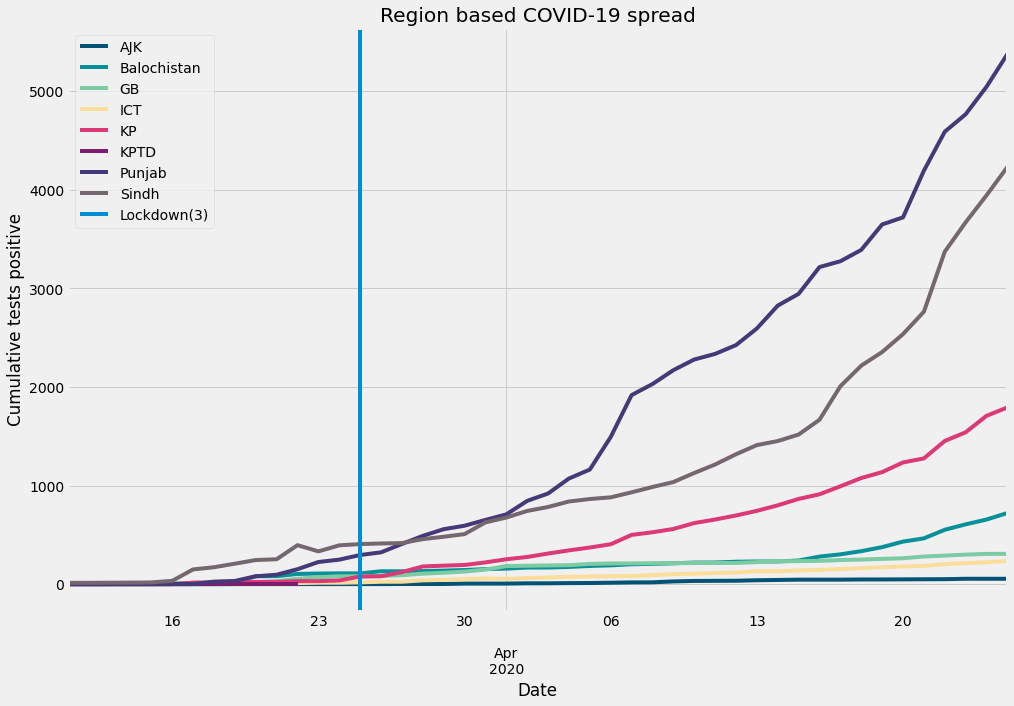

In [0]:
plot_data('Cumulative tests positive', "Region based COVID-19 spread")

### Plot # 02
In this plot we focus on regional analysis of cumulative expired cases i.e. number of cases in a temporal fashion which resulted in the sad demise of the affected individuals. For each region, we figure out how the number of cases expired have grown/changed over time and plot them vs the dates provided. The graph growth explains the regions which have seen surge in the number of cases.

Visually, we can see that the surge started in KP, it could be due to poor healthcase system there or also due to higher number of average age of individuals there. Sindh started close to KP pre-lockdown (the blue vertical line indicates the onset of nation-wide lockdown). Punjab also was pretty close to KP and Sindh. However, as the weeks progressed, initially Punjab took over both Sindh and KP. We saw a decrease in KP for some time. Eventually, as the incubation period of the COVID-19 virus reached its end (14-20 days approximately), KP's graph exploded exponentially. Punjab decreased, could be due to better health care system in comparision or due to wide spread area and consequently greater population (lower average age). Therefore, Sindh took over Punjab. 
Then we have regions with fewer cases such as ICT, Balochistan, AJK, and GB. Due to fewer positive cases (check Plot # 01) in these areas, there are fewer deaths.

This leaves us with three regions who have experienced explosive growth in terms of number of expired cases. These regions are:
1. KP
2. Sindh
3. Punjab

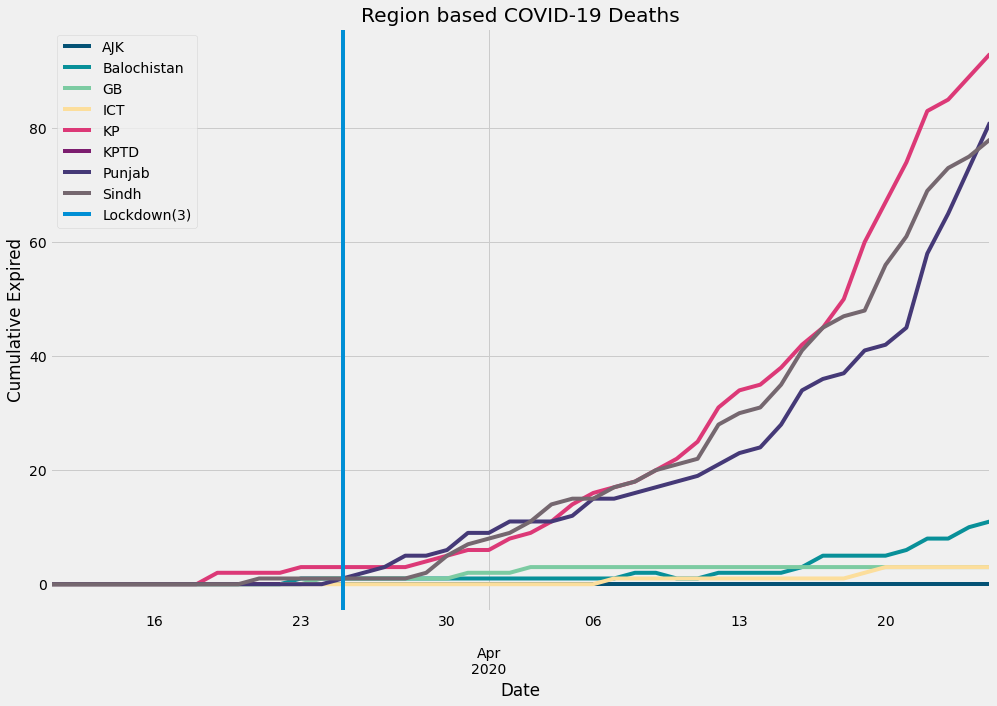

In [0]:
plot_data('Cumulative Expired', "Region based COVID-19 Deaths")

### Plot # 03
In this plot we focus on regional analysis of cumulative tests performed i.e. number of tests performed over time. It is obvious that these figures should be correlated with the population and also with positive test cases (see Plot # 01).
Due to the largest population in Punjab (sharing almost 50% of total population of the country, 2017 census), we had seen a surge in number of cases positive. Therefore, a case is positive only when a patient is tested. Therefore, we have Punjab at number 1 in terms of tests performed, followed by Sindh (since the pandemic wave started in Sindh at first), and eventually KP, which is currently on the rise.

Other regions such as ICT, GB, Balochistan, etc have fewer number of cases and consequently fewer tests performed.

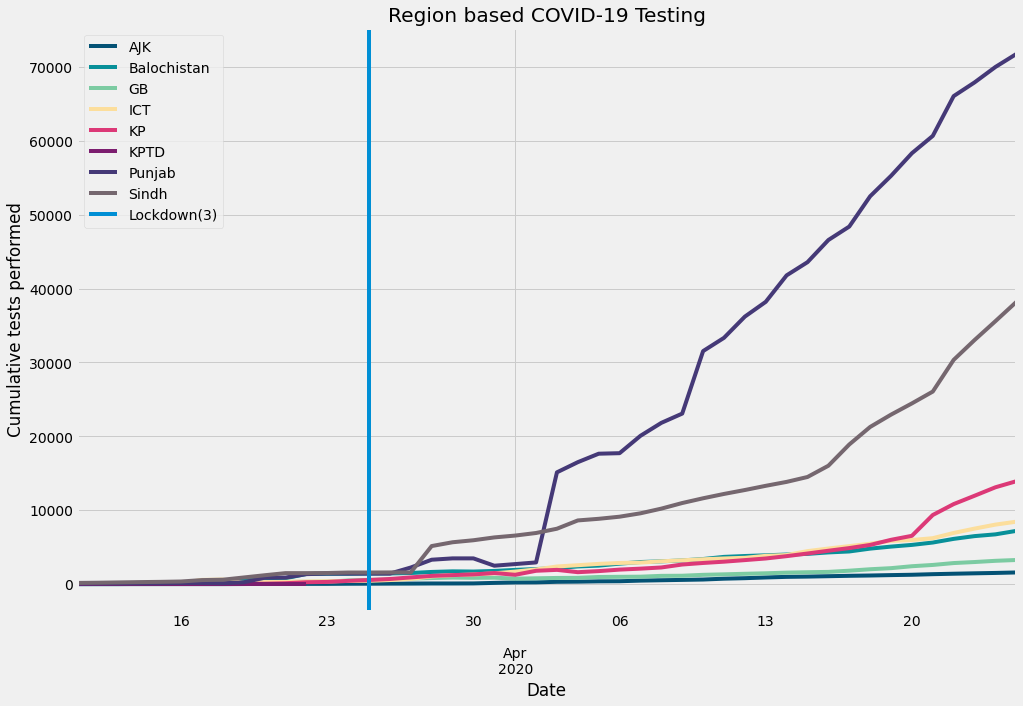

In [0]:
plot_data('Cumulative tests performed', "Region based COVID-19 Testing")

### Plot # 04
This is probably one of the most important graphs in this step since it computes the mortality rate of COVID-19 with $R_0 \ge 1$. We also analyze the mortality rate per population density in the upcoming plots (see Plot # 07). 
The mortality rate is computed as: $$\sum_{i=0}^{n}(\frac{c(e_i)}{c(s_i)})\times 100$$

where $c(e_i)$ is the cumulative expired at $i-$th index and $c(s_i)$ is the cumulative cases at $i-$th index. Although summation should result in a single value, but we follow the temporal spread analysis, plotting at each time sequence (date time in this case).
The temporal moratlity rate explains how rates have changed in each of the region.
Following up on our previous analysis, we saw that KP had largest number of deaths due to either i) poor health care system or ii) greater average age of population. Therefore, it is intuitive to follow that mortality rate of KP should be higher than that of others. We see the trend to be consistent in this case. KP experiened a high mortality rate of about $3.0$ which eventually declined as lockdown was enforced. In the previous analysis of deaths (see Plot # 02), Sindh followed KP which was then followed by Punjab. We see a similar trend here as well. However, as we approach the April end, we see a slight decrease in KP and Sindh, whereas an increase in Punjab (an upward trend). Other regions such as GB, ICT, AJK have had fewer number of cases, fewer deaths and eventually lower mortality rate.
Therefore, we can safely say that the regions based on moratlity rates can be ranked as follows.

1. KP
2. Sindh
3. Punjab

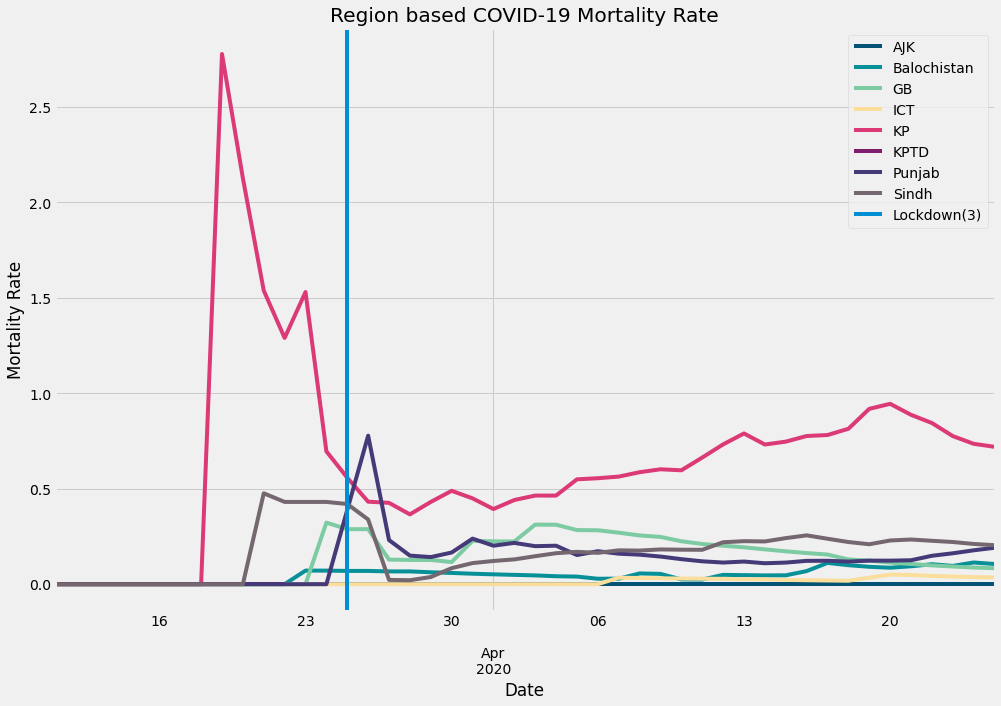

In [0]:
plot_data('Mortality Rate', "Region based COVID-19 Mortality Rate")

In [0]:
def plot_bar(col, name):
    fig, ax = plt.subplots(figsize=(15,8))
    ax.set_xlabel('Region')
    ax.set_ylabel(col)
    val, keys = [], []
    for key, grp in df.groupby(['Region']):
        val.append(int(grp[col].iloc[-1]))
        keys.append(key)
    ax.bar(keys, val)
    plt.title(name)
    plt.show()

### Plot # 05
In this and the next graph, we plot the number of available beds and quarantine facilities available to the regions. Since the pandemic started in Sindh, we see that it has the highest number of beds available, followed by KP (explosive growth) and then we have Punjab following them both.

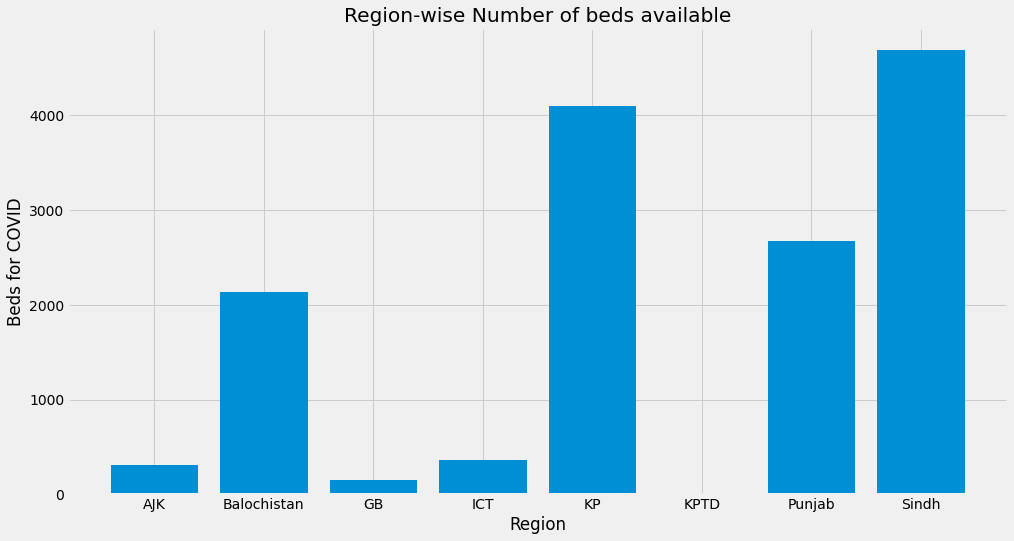

In [0]:
plot_bar('Beds for COVID', 'Region-wise Number of beds available')

### Plot # 06
In this plot, we examine the quarantine facilities available to each region. The data is a bit surprising here since Sindh has a few number of quarantine facilities, even lower than AJK and Balochistan. This could be a mis-representation in the data provided since it is hard to believe that only 17 (exact number according to the data provided) quarantine facilities available provided Sindh government was most effective in taking preventive measures as the pandemic started there.

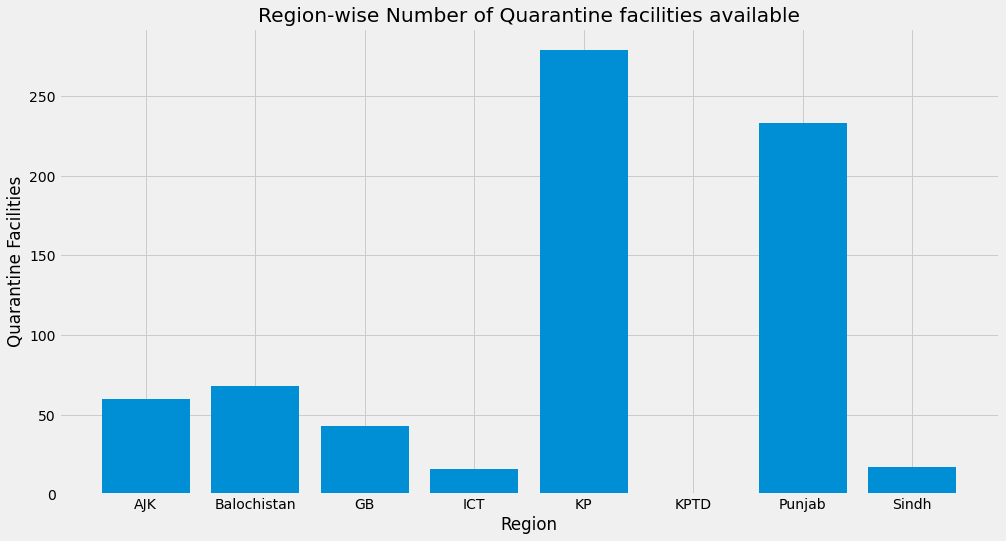

In [0]:
plot_bar('Quarantine Facilities', 'Region-wise Number of Quarantine facilities available')

### Plot # 07
Following up on our previous moratlity rate plot (see Plot # 05), we explore the moratality rate per density (we compute per $1000$ people) for each region. This helps us analyze the number of deaths per $1000$ people for each region. Note that this number is dependent on the population of each region (population $\frac{1}{\propto}$ desity-oriented mortality rate).
The formula for moratlity rate per $10^n$ where $n=3$ refers to $1000$ people is given by: $$\sum_{i=0}^{n}(\frac{c(e_i)}{p})\times10^n$$

We set $n = 3$ in this case i.e. per $1000$ people.
We follow from our previous results that KP should be leading in this case as well (we see that the analysis is sound in this case as well). We have Sindh in the second place. However, since Punjab has the largest population, the per density rate is significantly lower in this case. We see a rise in Gilgit Baltistan (GB) and Islamabad (ICT) in this case due to lesser population compared to the number of deaths. We established the inverse proportionality, and the results follow.

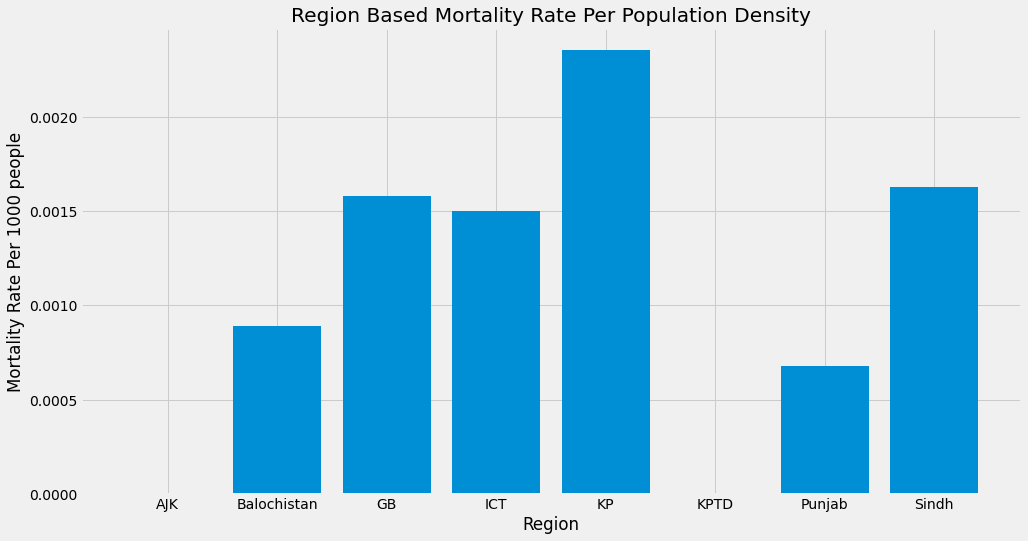

In [0]:
def mortality_rate_per_population_density():
    fig, ax = plt.subplots(figsize=(15,8))
    ax.set_xlabel('Region')
    ax.set_ylabel('Mortality Rate Per 1000 people')
    val, keys = [], []
    for key, grp in df.groupby(['Region']):
        val.append(((grp['Cumulative Expired'].iloc[-1]) / (grp['Population'].iloc[-1]))*1000)
        keys.append(key)
    ax.bar(keys, val)
    plt.title('Region Based Mortality Rate Per Population Density')
    plt.show()
mortality_rate_per_population_density()

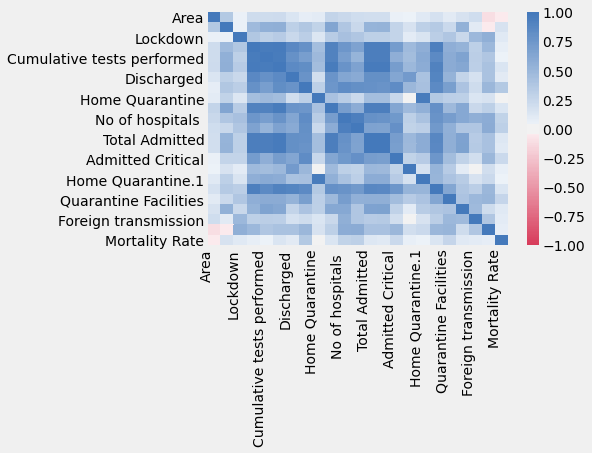

In [0]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(5, 250, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### Plot # 08
These are correlation matrices, plotted to work out the correlation between each column. The correlation can help us understand the dependence of certain core values such as deaths, positive cases, cumulative cases on other factors and on each other. We see that there exists a correlation between ```cumulative cases``` and ```cumulative tests positive```. Similarly, there is a high correlation between ```BEDS for COVID``` and ```cumulative expired```.
We leverage these values in our future analysis in Step # 02 where forecast the previous results.

In [0]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)


corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation Matrix")\
    .set_precision(2)

,Area,Population,Lockdown,Cumulative Cases,Cumulative tests performed,Cumulative tests positive,Discharged,Cumulative Expired,Home Quarantine,Still admitted,No of hospitals,Beds for COVID,Total Admitted,Admitted Stable,Admitted Critical,Admitted Venilator,Home Quarantine.1,Recovered,Quarantine Facilities,Cumulative Quarantined,Foreign transmission,Local transmission,Mortality Rate
Area,1.00,0.36,0.05,0.21,0.22,0.22,0.15,0.08,0.10,0.27,0.25,0.21,0.19,0.19,0.05,0.04,0.11,0.17,0.11,0.17,0.21,-0.11,-0.05
Population,0.36,1.00,0.06,0.47,0.55,0.57,0.31,0.37,0.28,0.65,0.38,0.25,0.53,0.53,0.28,0.16,0.31,0.36,0.23,0.54,0.10,-0.04,0.16
Lockdown,0.05,0.06,1.00,0.37,0.31,0.34,0.25,0.33,0.13,0.33,0.43,0.38,0.30,0.30,0.28,0.09,0.15,0.32,0.38,0.25,0.49,0.56,0.11
Cumulative Cases,0.21,0.47,0.37,1.00,0.96,0.98,0.86,0.79,0.44,0.91,0.75,0.66,0.94,0.94,0.71,0.47,0.57,0.93,0.57,0.54,0.30,0.49,0.08
Cumulative tests performed,0.22,0.55,0.31,0.96,1.00,0.96,0.79,0.69,0.48,0.91,0.69,0.52,0.94,0.94,0.57,0.45,0.61,0.86,0.59,0.65,0.32,0.38,0.04
Cumulative tests positive,0.22,0.57,0.34,0.98,0.96,1.00,0.85,0.82,0.45,0.96,0.78,0.66,0.97,0.97,0.70,0.49,0.58,0.91,0.59,0.62,0.32,0.41,0.14
Discharged,0.15,0.31,0.25,0.86,0.79,0.85,1.00,0.78,0.19,0.77,0.63,0.60,0.81,0.81,0.64,0.72,0.41,0.89,0.53,0.28,0.18,0.42,0.10
Cumulative Expired,0.08,0.37,0.33,0.79,0.69,0.82,0.78,1.00,0.30,0.76,0.83,0.82,0.80,0.79,0.83,0.51,0.43,0.85,0.69,0.40,0.22,0.50,0.37
Home Quarantine,0.10,0.28,0.13,0.44,0.48,0.45,0.19,0.30,1.00,0.43,0.33,0.23,0.44,0.44,0.25,-0.02,0.97,0.37,0.32,0.31,0.15,0.16,0.03
Still admitted,0.27,0.65,0.33,0.91,0.91,0.96,0.77,0.76,0.43,1.00,0.70,0.58,0.94,0.94,0.64,0.47,0.55,0.80,0.48,0.61,0.24,0.31,0.14


In [0]:
def region_dataframe(key):
    return (df.loc[df["Region"] == key].reset_index())

In [0]:
def compute_differences(dframe):
    dframe['difference Cumulative Cases'] = dframe['Cumulative tests positive'].diff().apply(abs)
    dframe.fillna(0, inplace=True)
    return dframe

In [0]:
AJK_df = compute_differences(region_dataframe('AJK'))
Punjab_df = compute_differences(region_dataframe('Punjab'))
KPTD_df = compute_differences(region_dataframe('KPTD'))
ICT_df = compute_differences(region_dataframe('ICT'))
Sindh_df = compute_differences(region_dataframe('Sindh'))
KP_df = compute_differences(region_dataframe('KP'))
GB_df = compute_differences(region_dataframe('GB'))
Baloch_df = compute_differences(region_dataframe('Balochistan'))

In [0]:
def response_effectiveness(df1, df2, name1, name2):
    ax, fig = plt.subplots(figsize=(20,7))
    ax = plt.subplot(1,2,1)
    df1.plot(ax=ax, kind='line', x='Date', y='difference Cumulative Cases', label='Daily Cases')
    facilities = df1['Quarantine Facilities'].iloc[-1]
    plt.axhline(facilities, label='Facilities for patients', c='#a40000')
    plt.title(f'Daily cases vs facilities available in {name1}')
    plt.legend(loc='best')

    ax = plt.subplot(1,2,2)
    df2.plot(ax=ax, kind='line', x='Date', y='difference Cumulative Cases', label='Daily Cases')
    facilities = df2['Quarantine Facilities'].iloc[-1]
    plt.axhline(facilities, label='Facilities for patients', c='#a40000')
    plt.title(f'Daily cases vs facilities available in {name2}')
    plt.legend(loc='best')
    plt.show()


### Plot # 09
As we conclude the Step # 01, we boil down our analysis to how effective the response of each region has been. We work out the ```flatten-the-curve``` theory in this case. The horizontal line (red color) indicates the facilities available for patients, the plot indiates the daily cases. Since the data does not provide daily cases to us, we employ the standard continuous difference approach to compute the change in cumulative tests positive daily. We can simply define the approach as: $$\Delta(c(cp_i),c(cp_{i+1}))$$ 

where $c(cp_i)$ is the cumulative case positive at $i-$th index, and $\Delta$ is the difference operation between two consecutive values.
Basically, this tells us how number of positive cases vary daily. It is important to note that quarantine facilities in Sindh are significantly lower than any any other (which is very strange and could be an issue in the initial data provided). Generally, the cases below the line (red color) indicate that we have necessary facilities to take care of the daily cases, as the curve increase, it indicates that we are under-staffed i.e. the number of cases daily are much greater than the cases hospitals can cater to in each region. In the next plots, we can see that this is the case with almost every region. Punjab, Sindh, Balochistan, ICT face the similar problem of being under-staffed to cater to the daily COVID-19 positive cases.
It is important to note that according to the data, KP has enough facilities to cater to their daily influx of cases. Although there is high mortality rate in KP, the growth in cases/spread of COVID-19 is not explosive comparatively. Due to this we can conclude that the surge in KP is not as dangerous as that in Punjab and Sindh. The case is true for Balochistan and ICT as well where although the mortality rate is low, cases are less, but they are under-staffed.
However, in GB and AJK, the trend is similar to KP, but they are doing much better than KP due to lower mortality rate and less daily cases (is directly dependent on population as well). 

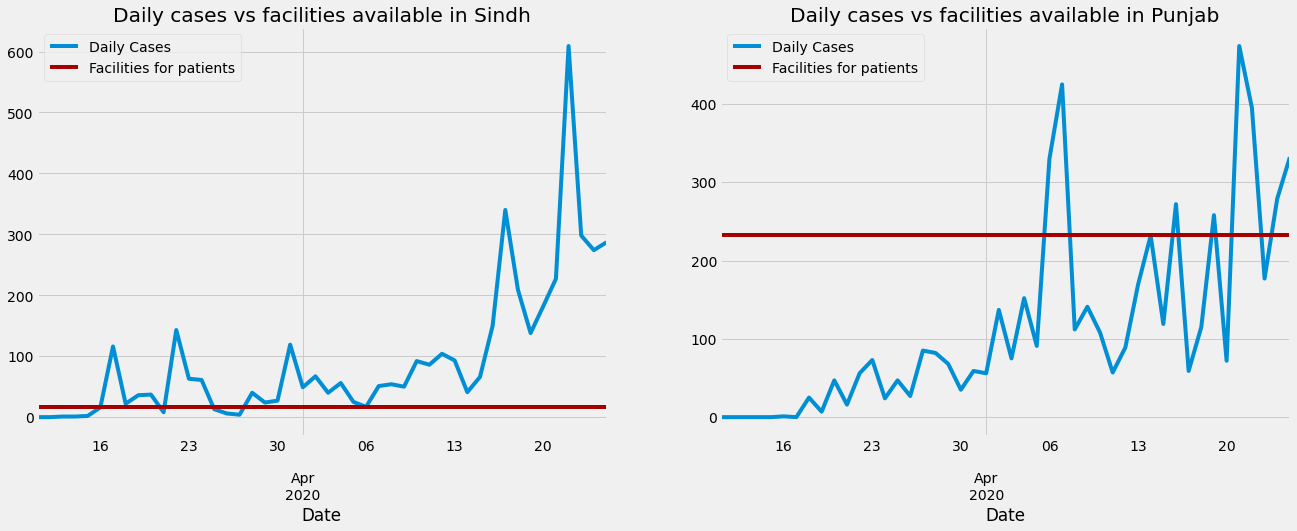

In [0]:
response_effectiveness(Sindh_df, Punjab_df, 'Sindh', 'Punjab')

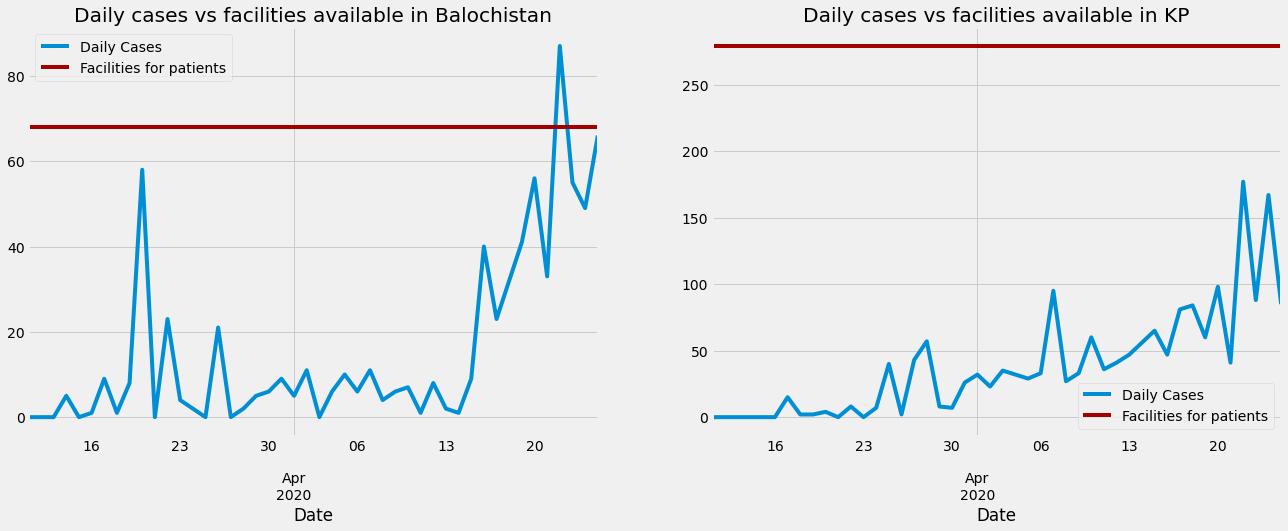

In [0]:
response_effectiveness(Baloch_df, KP_df, 'Balochistan', 'KP')

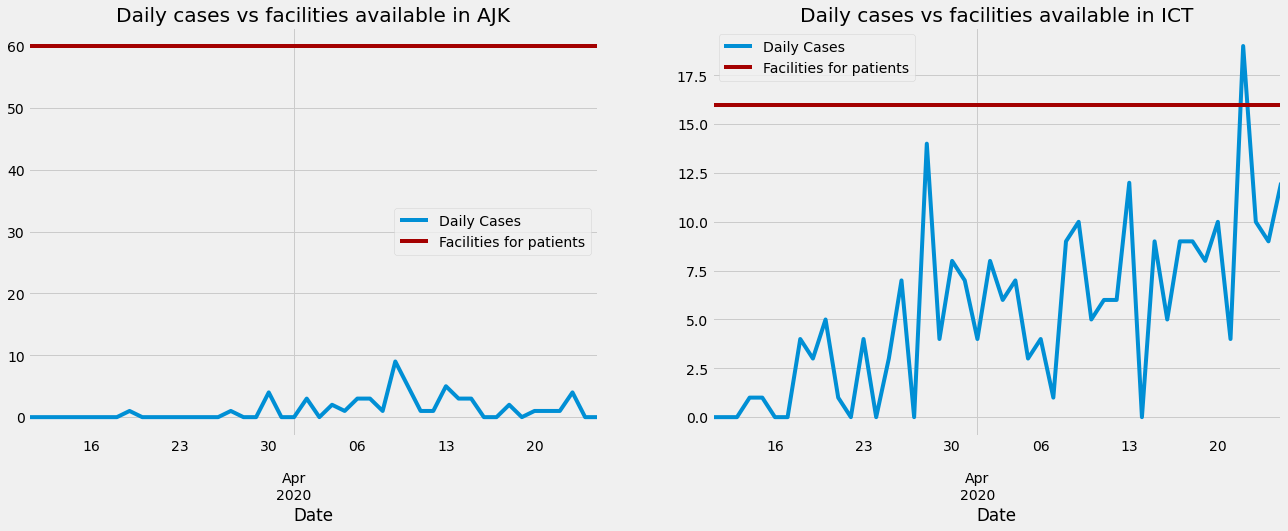

In [0]:
response_effectiveness(AJK_df, ICT_df, 'AJK', 'ICT')

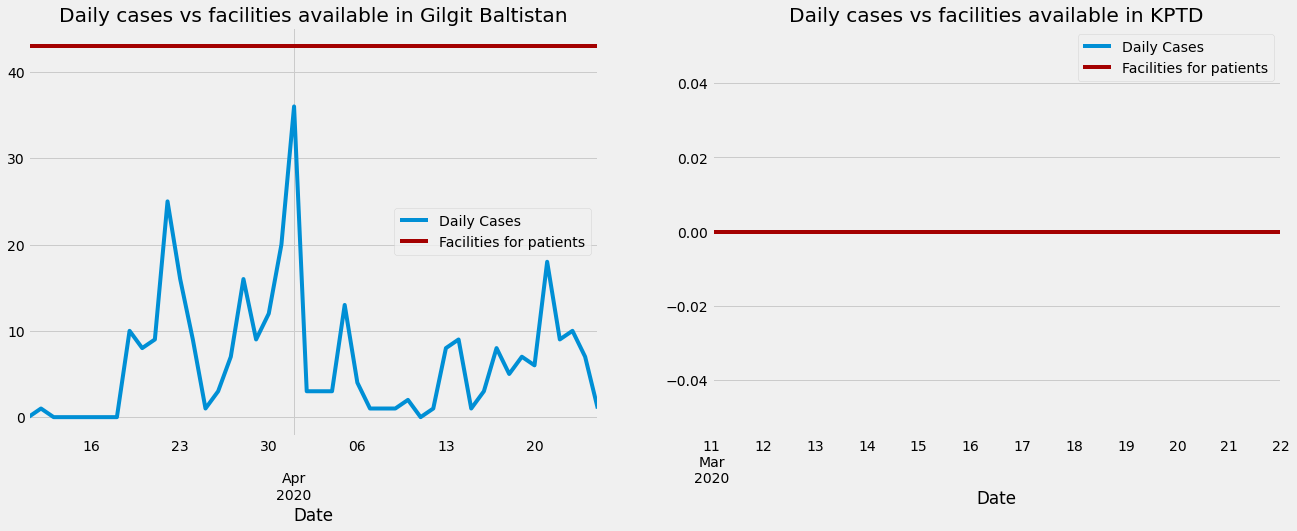

In [0]:
response_effectiveness(GB_df, KPTD_df, 'Gilgit Baltistan', 'KPTD')

### Conclusion of Step # 01
We conclude the Step # 01 which is based on the current response of each region towards the on-going pandemic COVID-19.
We have to rank regions on a $1$-$5$ scale where each rating corresponds to how successful each region has been.
The scale is defined as:

(a) $1$ => Most Successful

(b) $2$ => Successful

(c) $3$ => Average

(d) $4$ => Struggling

(e) $5$ => Most Struggling

There are several ways in which we rank each region. However, it is important that we consider the results in terms of their population as well. A region with 2 people would have only 2 cases at max compared to a region with 10 people which could have 10 cases at max. So, saying that the region with 2 people has been successful would be wrong since the moratlity rate (if 2 people died) of region with 2 people would be a 100% compared to 20% of the second region (which has 10 people). Therefore, we consider the density-focused mortality rate, the under-staffing of regions and overall moratlity rate to rate the regions. Here is how the regions are rated at the end of first step.

1. Most Successful Region => GB, AJK
2. Successful Region => ICT
3. Average Region => Balochistan
4. Struggling Region => KP
5. Most Struggling Region => Punjab, Sindh

There is another region (KPTD, what is that anyway?) with no data provided in the data sheet given. Therefore, we donot consider that throughout this analysis.

## Step # 02: Time Series Forecasting

This step is solely focused on learning previous patterns in cases spread and predicting those trends for future time periods. We predict one-week ahead for each region and work out the rating again.

In this step, we use the Box-Jenkins (ARIMA) approach to capture the trends in the stationary time-series data of each region. 
ARIMA stands for Autoregressive Integrated Moving Average. We assume that the data is Gaussian in nature i.e. it is normally distributed and the mean and variance are constant over a long time period, other words the series is stationary. This helps us to learn the trends effectively. The ARIMA method works on stationary series (data points) and therefore we perform predictions on those regions which follow this trend. Performing complex time-series analysis by converting the data to stationary is out of the scope of this analysis and therefore we did not go down that route since it would help in conclusively answering our initial question of ranking the regions.

The regions which are Gaussian in nature i.e. normally distributed data are Punjab, ICT, Balochistan and Gilgit Baltistan. 
According to this analysis, we see that there is expected increase in Punjab in the next day (which would be greater than the previous day) and eventually we would see a little decline in the cases. This is opposite for ICT which is on a constant rise in the next week. Similar to ICT, we have GB which would also see an increase in the cases in upcoming days. However, in Balochistan's case we see that there is a sudden decrease in the number of daily cases. This analysis is correlated to our previous conclusions i.e. Punjab continues to remain the most struggling region (although there is little decline), but it eventually stops at the upward trend. 
Finding actual numbers from COVID-19 government's portal, we see that daily cases in Punjab in April-end and May-early are: 

1. 22/04 => 262
2. 23/04 => 177
3. 24/04 => 279
4. 25/04 => 332


5. 26/04 => 68
6. 27/04 => 194
7. 28/04 => 187
8. 29/04 => 234
9. 30/04 => 279
10. 1/05 => 418
11. 2/05 => 579

The data provided for this challenge is till 25/04/2020. Our model predicted that there would be a decrease followed by an increase, since we predicted for 1 week, therefore we have results till 02/05/2020. We see that approximately predictions are consistent with the actual numbers i.e. there is a similar trend between real and predicted results for Punjab. Similarly, we can work out for ICT, Balochistan and GB and conclude that our model accurately predicts the future cases.


In [0]:
def prepare_dataset_forecasting(df):
    dataset = df[['Date', 'Cumulative tests positive']]
    dataset.rename(columns = {'Date':'ds', 'Cumulative tests positive': 'y'}, inplace = True)
    dataset['ds'] =  pd.to_datetime(dataset['ds'], format='%m/%d/%Y')
    dataset.set_index('ds', inplace=True)
    return dataset

In [0]:
def get_dates_for_a_range(start, end):
    daterange = [start + timedelta(days=x) for x in range(0, (end-start).days)]
    return daterange

def difference(dataset, takeLog=False):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat):
    return abs(yhat + history[-1]) # take the previous value and add new cases

def compute_out_of_forecast_week(X, takeLog=False):
    X = [x for x in X if x != 0]
    differenced = difference(X, takeLog)
    model = ARIMA(differenced, order=(7,0,1))
    model_fit = model.fit(disp=0)
    start_index = len(differenced)
    end_index = start_index + 7
    forecast = model_fit.predict(start=start_index, end=end_index)
    history = [x for x in X]
    day = 1
    inverted_lst = []
    for yhat in forecast:
        inverted = inverse_difference(history, yhat)
        history.append(inverted)
        day += 1
        inverted_lst.append(inverted)
    return inverted_lst

def new_cases_per_day(lst_cases):
    return list(np.diff(lst_cases))


In [0]:
def predict_future_spread(df1, df2, name1, name2):
    ax, fig = plt.subplots(figsize=(20,7))

    ax = plt.subplot(1,2,1)
    X = prepare_dataset_forecasting(df1).values
    predictions = new_cases_per_day([float(x) for x in compute_out_of_forecast_week(X)])
    prev = df1['difference Cumulative Cases'].values.tolist()
    start = date(2020, 3, 11)
    end = date(2020, 5, 3)
    dates = get_dates_for_a_range(start, end)
    ax.plot(dates, prev + predictions, label='Daily Cases')
    ax.axvline(date(2020, 4, 25), label='prediction start point', c='#a40000')
    plt.title(f'Future Daily cases Prediction for {name1}')
    plt.legend(loc='best')
    plt.xticks(rotation=90)

    ax = plt.subplot(1,2,2)
    X = prepare_dataset_forecasting(df2).values
    predictions = new_cases_per_day([float(x) for x in compute_out_of_forecast_week(X)])
    prev = df2['difference Cumulative Cases'].values.tolist()
    start = date(2020, 3, 11)
    end = date(2020, 5, 3)
    dates = get_dates_for_a_range(start, end)
    ax.plot(dates, prev + predictions, label='Daily Cases')
    ax.axvline(date(2020, 4, 25), label='prediction start point', c='#a40000')
    plt.title(f'Future Daily cases Prediction for {name2}')


    plt.legend(loc='best')
    plt.xticks(rotation=90)
    plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in subtra

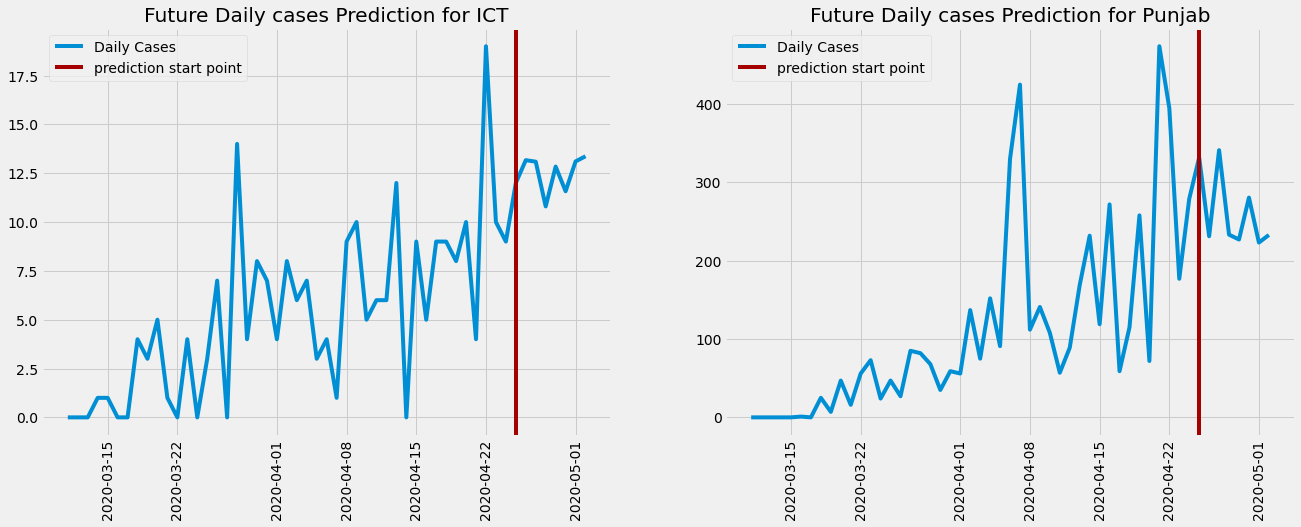

In [0]:
predict_future_spread(ICT_df, Punjab_df, 'ICT', 'Punjab')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


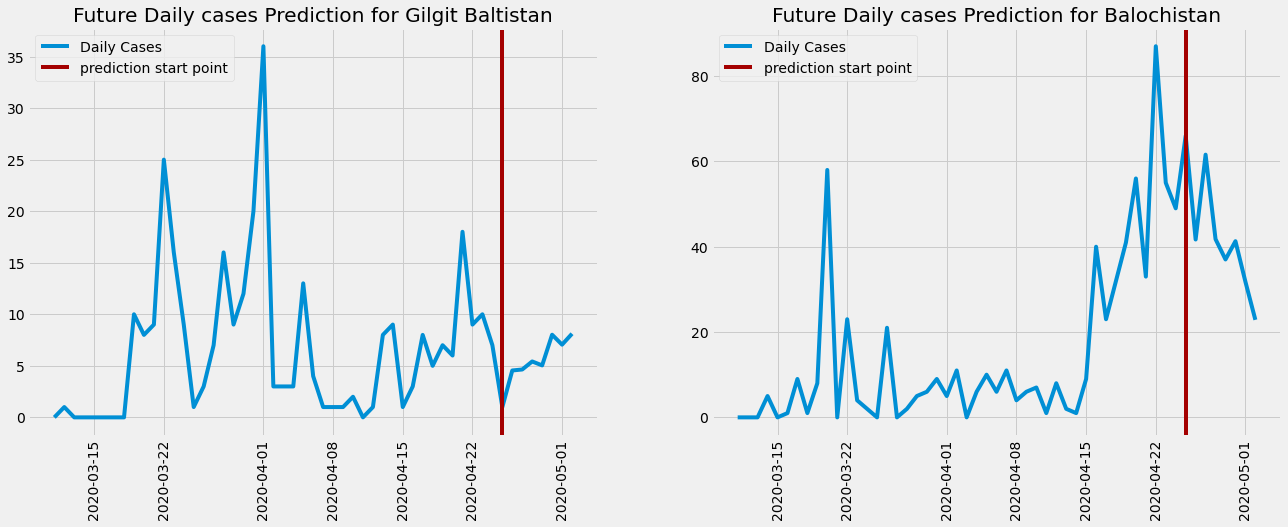

In [0]:
predict_future_spread(GB_df, Baloch_df, 'Gilgit Baltistan', 'Balochistan')

### Conclusion Step # 02
Concluding the rankings of previous analysis, we can say that:

1. Most Successful Region => AJK
2. Successful Region => GB
3. Average Region => ICT, Balochistan
4. Struggling Region => KP
5. Most Struggling Region => Punjab, Sindh

Averaging results from both steps, we get similar results.
